<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Andrés Hernández Jiménez.

**Fecha:** 09 de Marzo del 2021.

**Expediente** : 717710 | 717895.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Rub27182n/Proyecto-SPF.git

# Proyecto TEMA-2

In [1]:
# <font color='midnightblue'>

# <font color='midnightblue'> 1. Análisis y Simulación de Videos de Youtube

> En este proyecto, examinaremos a detalle y simularemos las variables más escenciales de un video de YouTube: Likes, Dislikes, Comments y Views para obtener los estadísticos más probables de un hipotético video.

# <font color='midnightblue'> 2 . Objetivos

> ###  <font color='midnightblue'> Generales
>> Consideramos como objetivo principal, el generar un modelo/función que permita simular, a partir de parámetros o características clave de un video de YouTube, sus principales estádisticos.
    
> ###  <font color='midnightblue'> Específicos
>> - Encontrar las categorías de video más populares y etiquetarlas.
>> - Obtener la Función de Distribución de Probabilidad de cada estadístico para las categorías más populares.
>> - Simular cantidad de Likes, Dislikes, Comments y Views para las categorías más populares.
    



# <font color='midnightblue'> 3.  Definición del Problema
    
> En este proyecto queremos plantear la idea de una compañía que opera con Data Science,  y que a través de una base de datos de videos de YouTube, le es posible obtener distribuciones de probabilidad y simular casos específicos de hipotéticos videos, a los cuales se pretende estimar su recibimiento (número de vistas, likes, dislikes y comentarios) en la plataforma. 
    
> Todos los datos que se utilizarán son datos reales de videos en Youtube México y YouTube Estados Unidos. Con los 4 estadísticos previamente mencionados, se podrá obtener la información necesaria para evaluar las diferentes categorías de videos y su recibimiento en la plataforma a través de simulación Monte Carlo. Estos parámetros serán los nodos para trabajar específicamente y a través de estos se generarán datos que nos permiten cumplir con el objetivo central, examinar a detalle y simular las variables escenciales de un video de YouTube. 

# <font color='midnightblue'> 4. Nodos/Variables a Simular

> Los nodos/variables que elegimos son:
> - Número de Vistas
> - Cantidad de Likes
> - Cantidad de Dislikes
> - Número de Comentarios
> - Categoría de Videos

> Estos nodos fueron elegidos porque generamos la hipótesis de que intrínsecamente están correlacioandos y además se pueden simular ante el supuesto de un video ingresado en la red y su desempeño en la plataforma. La categoría de video es un filtro fundamental para poder separar los resultados de acuerdo con lo que la gente quiere ver basándonos en su popularidad actual. La ratio entre likes y dislikes nos darán una muy buena idea de cómo se desempeña el video una vez en la plataforma. El número de vistas y sus respectivos comentarios afirmarán si este video está volviéndose popular.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta
from scipy import optimize
from time import time
from collections import Counter
import scipy.stats as st
from fitter import Fitter
from CDIN import CDIN as eda
import statsmodels.api as sm 
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

## Limpieza de la base de datos

In [2]:
#mx = pd.read_csv('MXvideos.csv')
#mx.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace=True, axis=1)
#df = mx[~mx.duplicated(subset = ['video_id'])]
#(df['video_id'].unique()).shape
#index_names = df[(df['likes'] == 0) | (df['dislikes'] == 0 ) | (df['comment_count'] == 0 )].index
#df.drop(index_names, inplace = True)

In [3]:
data = pd.read_csv('MXvideos.csv')
datax=np.log(data.iloc[:,7])
datay=np.log(data.iloc[:,8])
datay=datay.replace(-np.inf, np.nan).dropna()
datax=datax.replace(-np.inf, np.nan).dropna()
datax

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        12.644747
1        11.561449
2        11.820881
3        11.473696
4        13.122293
           ...    
40446    13.389507
40447    11.709101
40448     9.551587
40449    10.038805
40450    11.598516
Name: views, Length: 40451, dtype: float64

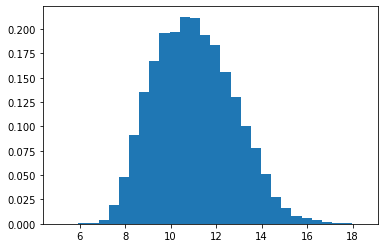

In [4]:
plt.hist(datax,30,density=True);

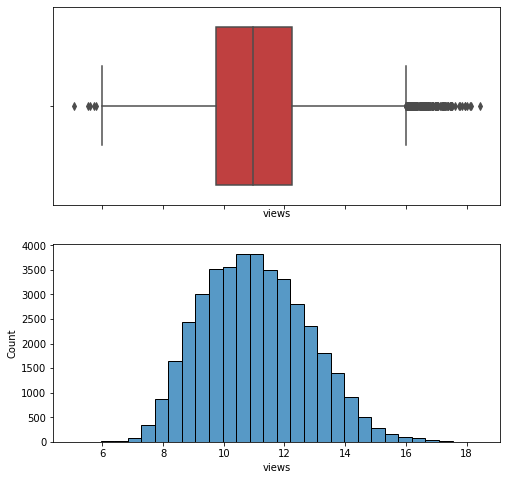

In [5]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(8,8))
sns.histplot(datax, ax=ax2, bins=30)
sns.boxplot(x=datax, ax=ax1, saturation=.5, color='r')

## Utilizando scikit-learn

In [6]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    #score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [7]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using scikit-learn')

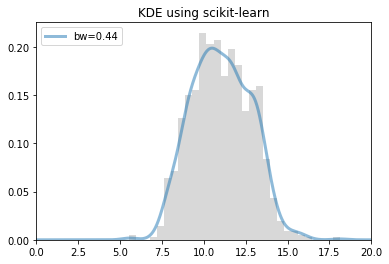

In [8]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using scikit-learn')

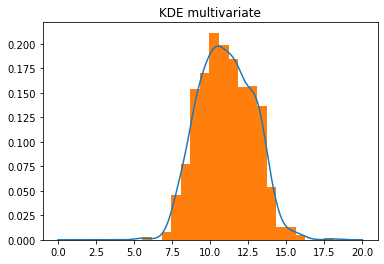

In [9]:
kde_multivariate=KDEMultivariate(data=x ,var_type='c', bw='cv_ml')
f_multi_kde= lambda x: kde_multivariate.pdf(x)
plt.plot(x_grid, f_multi_kde(x_grid))
plt.hist(x,bins=20, density=True)
plt.title('KDE multivariate')
plt.show()

In [10]:
f_multi_kde

<function __main__.<lambda>(x)>

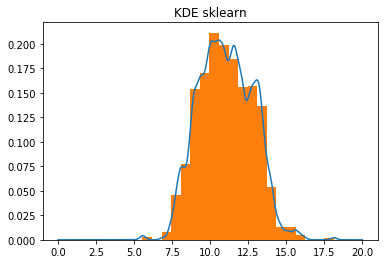

In [11]:
kde_sklearn= KernelDensity(kernel='gaussian', bandwidth=0.19).fit(x[:, np.newaxis])
f_skle= lambda x: np.exp(kde_sklearn.score_samples(x[:, None]))

plt.plot(x_grid, f_skle(x_grid))
plt.hist(x,bins=20, density=True)
plt.title('KDE sklearn')
plt.show()

In [12]:
f_skle

<function __main__.<lambda>(x)>

## Utilizando Scipy

In [13]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [14]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using Scipy')

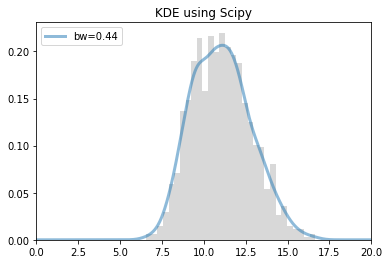

In [15]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Scipy')

## Utilizando Statsmodels Univariate

In [16]:
def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

In [17]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.2222222222222222}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using Univariate Statmodel')

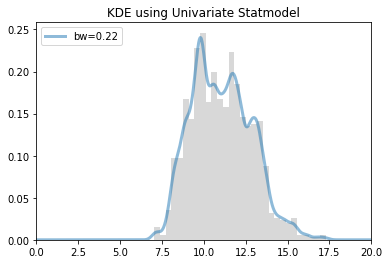

In [18]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Univariate Statmodel')

## Utilizando Statsmodels Multivariate

In [19]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

In [20]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using Multivariate Statmodel')

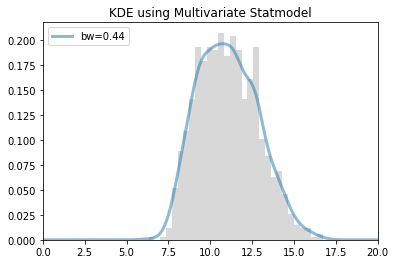

In [21]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Multivariate Statmodel')

## Ajuste a una distribución conocida

In [22]:
# -------------------- Distribuciones Seleccionadas Específicamente Para Este Nodo --------------------
dist_list = ['beta', 'burr12', 'chi', 'chi2', 'exponweib', 'gengamma', 'logistic', 'nakagami', 'nct', 'norm', 'pearson3']

In [23]:
# -------------------- Función Para Obtener Histograma junto con Distribuciones y su Respectivo Error --------------------
def distribuciones(dist_list, datax, bins):
    plt.figure(figsize = (16, 8))
    global err, x, y, J
    J=bins
    
    err = pd.DataFrame(index = dist_list, columns = ['error'])
    
    y, x,  _ = plt.hist(datax, bins = bins, density = True)
    x = x[1:]
    
    def ajuste_dist(dist):
        params = getattr(st, dist).fit(datax)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
    
    plt.legend()
    plt.show()

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


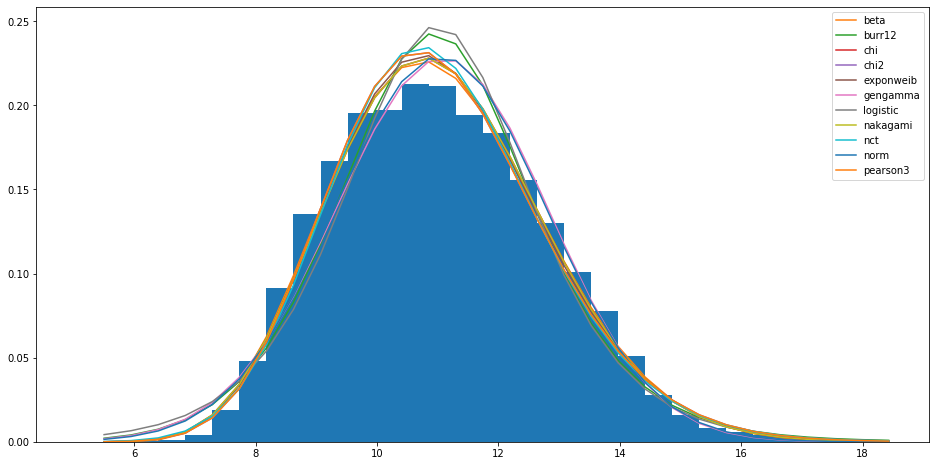

In [24]:
distribuciones(dist_list, datax,30)

In [25]:
# -------------------- Top 5 Distribuciones Para 'Views' --------------------
err.sort_values(by = 'error').head(5)

,error
beta,0.000126247
norm,0.000127113
gengamma,0.000130526
chi,0.000131892
nakagami,0.0001319


In [26]:
best = err.sort_values(by = 'error').head(5).index.values


## Prueba Q-Q para la distribución Beta, Nodo 1

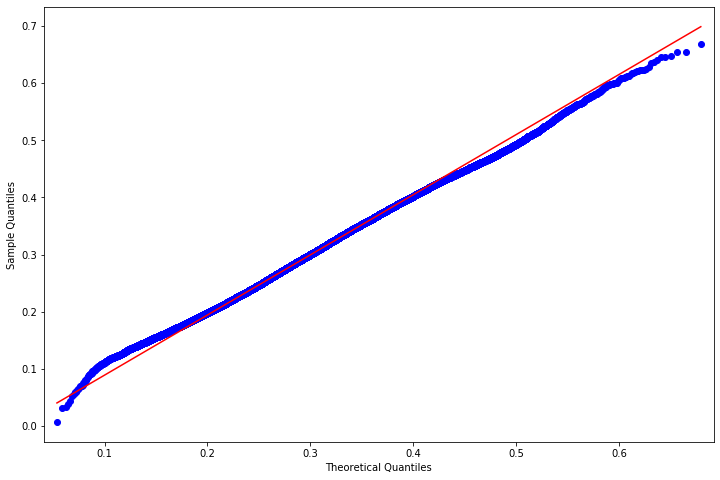

In [27]:
dist = best
fig, ax = plt.subplots(1,1, figsize = [12, 8])
g1 = sm.qqplot(datax, dist = getattr(st, best[0]), line = 'q', fit = True, ax = ax)

## Pruebas de Bondad y Ajuste

In [28]:
# Media y desviación estándar muestral
mu = np.mean(datax)
sigma = np.std(datax)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

media mu =11.046463, desviación estándar muestral =1.741396


In [29]:
param = getattr(st,'beta').fit(datax)
param

(8.367070990938144, 19.216057781575103, 4.91763443453833, 20.205542576156603)

In [30]:
pi = st.beta.pdf(x, *param)

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
#J= 30
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.90, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)
print('Media real: %f \nDesviación real muestral: %f'%(datax.mean(), datax.std()))

Valor de chi cuadrado teorico  =  20.4983857430144
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=20.4983857430144, pvalue=0.8767616360752771)
Estadístico de chi_cuadrado =  35.563171271923466
Media muestral =  11.046462863859714 
Desviación estándar muestral =  1.7413963918696223
Media real: 11.046463 
Desviación real muestral: 1.741418


## Fitter

In [32]:
from fitter import Fitter as ft
def fitter(data: 'datos',
           dist: 'distribuciones',
           t: 'interrupción', 
           b: 'bins'):
    '''
    función para método fitter
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    t: tiempo hasta la interrupción de la prueba para la distribución en curso
    b: número de bins
    '''    
    global f
    f = ft(data, distributions = dist, timeout = t, bins = b)
    f.fit()

Wall time: 15.2 s


,sumsquare_error,aic,bic,kl_div
beta,0.001644,272.885637,-688366.188343,0.004614
nakagami,0.002086,262.404034,-678742.492488,0.005853
chi,0.002087,262.404610,-678740.259919,0.005853
exponweib,0.002333,261.838593,-674210.276486,0.006286
chi2,0.002750,249.859954,-667567.652725,0.006943


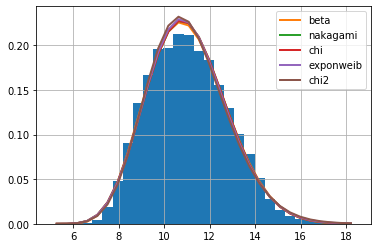

In [33]:
%%time
fitter(datax, dist_list, 15, 30)
f.summary()

## Ajuste Kolmogorov-Smirnov

#### <font color='midnightblue'> Hipótesis Nulas $H_0$:

In [34]:
h0 = ['$H_0$ = La PDF es {}'.format(dist) for dist in best]
h0

['$H_0$ = La PDF es beta',
 '$H_0$ = La PDF es norm',
 '$H_0$ = La PDF es gengamma',
 '$H_0$ = La PDF es chi',
 '$H_0$ = La PDF es nakagami']

#### <font color='midnightblue'> Hipótesis Alternas $H_a$:

In [35]:
ha = ['$H_a$ = La PDF no es {}'.format(dist) for dist in best]
ha

['$H_a$ = La PDF no es beta',
 '$H_a$ = La PDF no es norm',
 '$H_a$ = La PDF no es gengamma',
 '$H_a$ = La PDF no es chi',
 '$H_a$ = La PDF no es nakagami']

In [36]:
media, desviacion = st.norm.fit(datax)
d, pvalor = st.kstest(datax,"norm",args=(media,desviacion))

# queremos confianza al 99%
if pvalor < 0.01:
    print("No se ajusta a una normal")
else:
    print("Se puede ajustar a una normal")
pvalor
#El P value es demasiado pequeño por lo cual este ajuste puede no ser adecuado.

No se ajusta a una normal


1.3352138123194808e-31

In [38]:
def kol_smir_test(dist):   
    param = getattr(st, dist).fit(x)
    ks = st.kstest(x, dist, args=param)
    return dist, ks[0], ks[1]

In [39]:
top_kol_smir = [kol_smir_test(dist) for dist in best]
top_kol_smir.sort(key=lambda x:float(x[2]), reverse=True)
top_kol_smir

[('beta', 0.04162399598611266, 0.9999999994593357),
 ('norm', 0.07366544899615257, 0.9968221402214741),
 ('chi', 0.09819126510910292, 0.9345229417196239),
 ('nakagami', 0.09819150888904526, 0.9345217175588443),
 ('gengamma', 0.1345901730225596, 0.6188601662982806)]

### <font color='midnightblue'> De acuerdo con el P-value siendo mayor al nivel de significancia se pueden aceptar las tres Hipótesis Nulas $H_0$ confirmando que la mejor distribución del nodo Views es en $beta$:

## Metodos reducción de varianza

### Muestreo Estratificado

In [40]:
N = np.logspace(1,7,7,dtype=int)
B=N
def mues_est (B):
    u2= np.random.rand(B)
    i= np.arange(0,B)
    v=(u2+i)/B
    return v
ui_2= list(map(lambda x:mues_est(x),N))
f= [f_multi_kde(datax) for i in ui_2]

estrat=[f[i].mean() for i in range(len(f))]

In [41]:
mues_est(5)

array([0.03292009, 0.330868  , 0.47893215, 0.74344717, 0.8074426 ])

In [42]:
f_multi_kde(datax)

array([0.15398772, 0.18463641, 0.17704233, ..., 0.17253742, 0.19109469,
       0.18371466])

## Metodo Aceptación Rechazo

In [43]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]            
    plt.show()
    
    x=[R1[i] for i in range(len(R1)) if condition[i]]

El máximo de f es: 0.19758168650044194


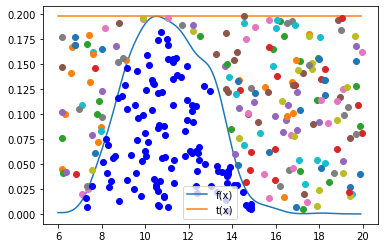

In [44]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
N=100
# Función objetivo 
f = f_multi_kde
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(6,20, 0.1)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 300 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(6,20, size=N)
Acep_rechazo(R2,R1, f,t)
# Prueba de función creada
#max_f=
#plt.hist(x_r,bins=50 density=True)